In [2]:
import cv2
# import matplotlib
# import matplotlib.pyplot as plt
import numpy as np
# import glob
# import os.path as osp
import torch
import argparse
import os.path as osp
import sys
import cv2
from loguru import logger

import torch

import random
import os
import numpy as np

import cv2
# import matplotlib
# import matplotlib.pyplot as plt
import numpy as np
import glob
import torch
# import torch.nn as nn 
import time
import math
from PIL import Image


In [3]:
path_gt = "/media/meysam/hdd/dataset/Dataset_UAV123/UAV123/anno/UAV123/car1_s.txt" 
img_files_path = glob.glob("/media/meysam/hdd/dataset/Dataset_UAV123/UAV123/data_seq/UAV123/car1_s/*")
img_files_path.sort()


In [14]:
my_file = open(path_gt)
lines = my_file.readlines()
my_file.close()

In [135]:
frame_idx = 900
line = [int(l) for l in lines[frame_idx][:-1].split(',')]
frame = cv2.imread(img_files_path[frame_idx], cv2.IMREAD_COLOR)
box = line



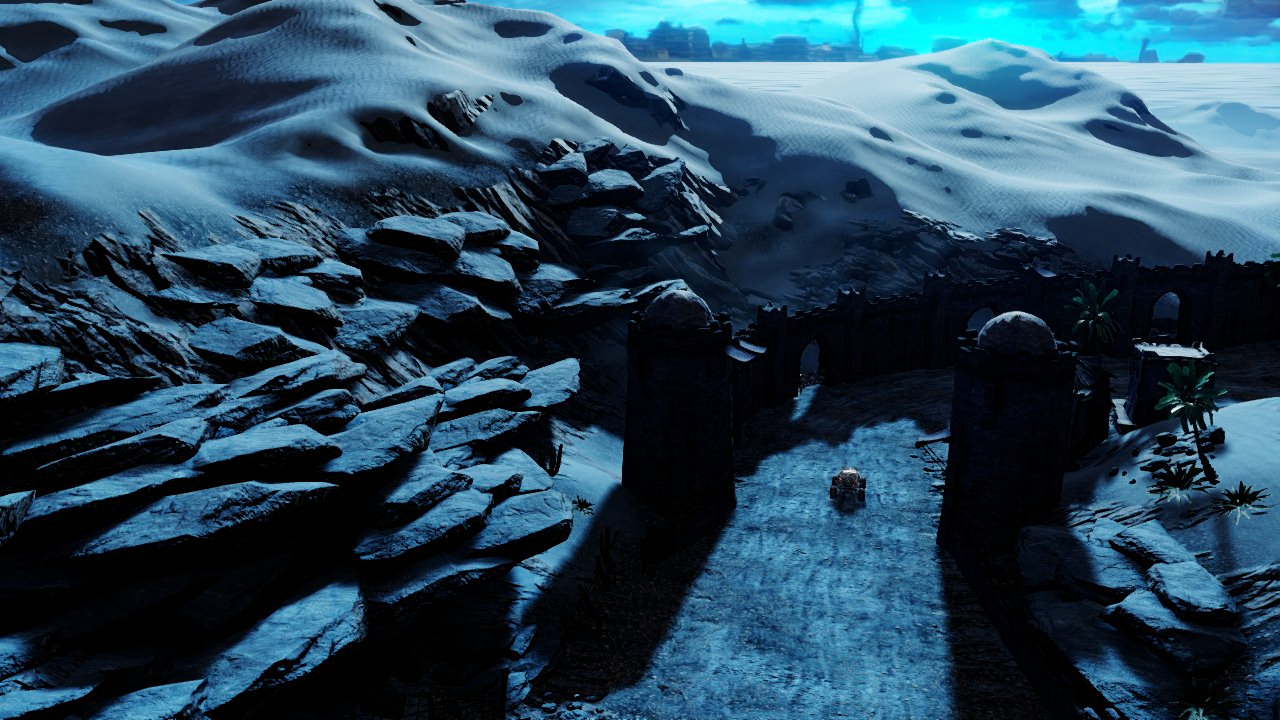

In [136]:
Image.fromarray(frame) 



In [137]:
q_size = 200
target_sz_area = box[2]*box[3]
search_area_factor = 4.0
search_area = search_area_factor*search_area_factor*target_sz_area;
target_scale = np.sqrt(search_area)/q_size;

In [138]:
output_sz = np.array([q_size, q_size])
sample_sz = target_scale * output_sz

In [139]:
im = frame

In [140]:
pos = np.array([box[1] + box[3]/2.0, box[0] + box[2]/2.0])


In [141]:
pos

array([485.5, 849. ])

In [142]:
posl = pos.astype(np.int).copy()

/tmp/ipykernel_33895/138908010.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  posl = pos.astype(np.int).copy()


In [143]:
posl

array([485, 849])

In [144]:
resize_factor = np.min(sample_sz.astype(np.float) / output_sz.astype(np.float)).item()
df = int(max(int(resize_factor - 0.1), 1))

/tmp/ipykernel_33895/3061859095.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  resize_factor = np.min(sample_sz.astype(np.float) / output_sz.astype(np.float)).item()


In [145]:
resize_factor

0.8653323061113575

In [146]:
sample_sz

array([173.06646122, 173.06646122])

In [147]:
sz = sample_sz.astype(np.float) / df

/tmp/ipykernel_33895/1597802736.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sz = sample_sz.astype(np.float) / df


In [148]:
sz

array([173.06646122, 173.06646122])

In [149]:
os = posl % df  # offset


In [150]:
os

array([0, 0])

In [151]:
posl = (posl - os) // df  # new position


In [152]:
posl

array([485, 849])

In [153]:
im2 = im[os[0].item()::df, os[1].item()::df, :]  # downsample

In [154]:
im.shape[0]/df

720.0

In [155]:
szl = np.maximum(np.round(sz), 2.0).astype(np.int)

/tmp/ipykernel_33895/1302277599.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  szl = np.maximum(np.round(sz), 2.0).astype(np.int)


In [156]:
szl

array([173, 173])

In [157]:
tl = posl - (szl - 1) // 2
br = posl + szl // 2 + 1

In [158]:
tl*df

array([399, 763])

In [159]:
br*df

array([572, 936])

In [160]:
cv2.rectangle(frame, (tl[1]*df, tl[0]*df),
				(br[1]*df, br[0]*df),
				(255,0,0), 2)
				

array([[[ 21,  31,  48],
        [ 24,  34,  51],
        [ 26,  36,  53],
        ...,
        [ 58, 109, 159],
        [ 58, 109, 159],
        [ 58, 109, 159]],

       [[ 20,  31,  51],
        [ 22,  34,  52],
        [ 23,  34,  54],
        ...,
        [ 60, 111, 161],
        [ 60, 111, 161],
        [ 59, 110, 160]],

       [[ 21,  36,  62],
        [ 21,  37,  60],
        [ 20,  35,  61],
        ...,
        [ 64, 113, 163],
        [ 63, 112, 162],
        [ 62, 111, 161]],

       ...,

       [[ 17,  94, 140],
        [ 25, 100, 144],
        [ 43, 115, 157],
        ...,
        [  0,   3,  10],
        [  6,  11,  20],
        [ 14,  20,  31]],

       [[ 40, 109, 149],
        [ 27,  94, 133],
        [ 26,  89, 127],
        ...,
        [  0,   6,  13],
        [  3,   8,  17],
        [  2,   9,  18]],

       [[ 59, 124, 162],
        [ 80, 144, 179],
        [ 72, 130, 166],
        ...,
        [  2,   8,  13],
        [ 10,  15,  24],
        [  7,  14,  23]]

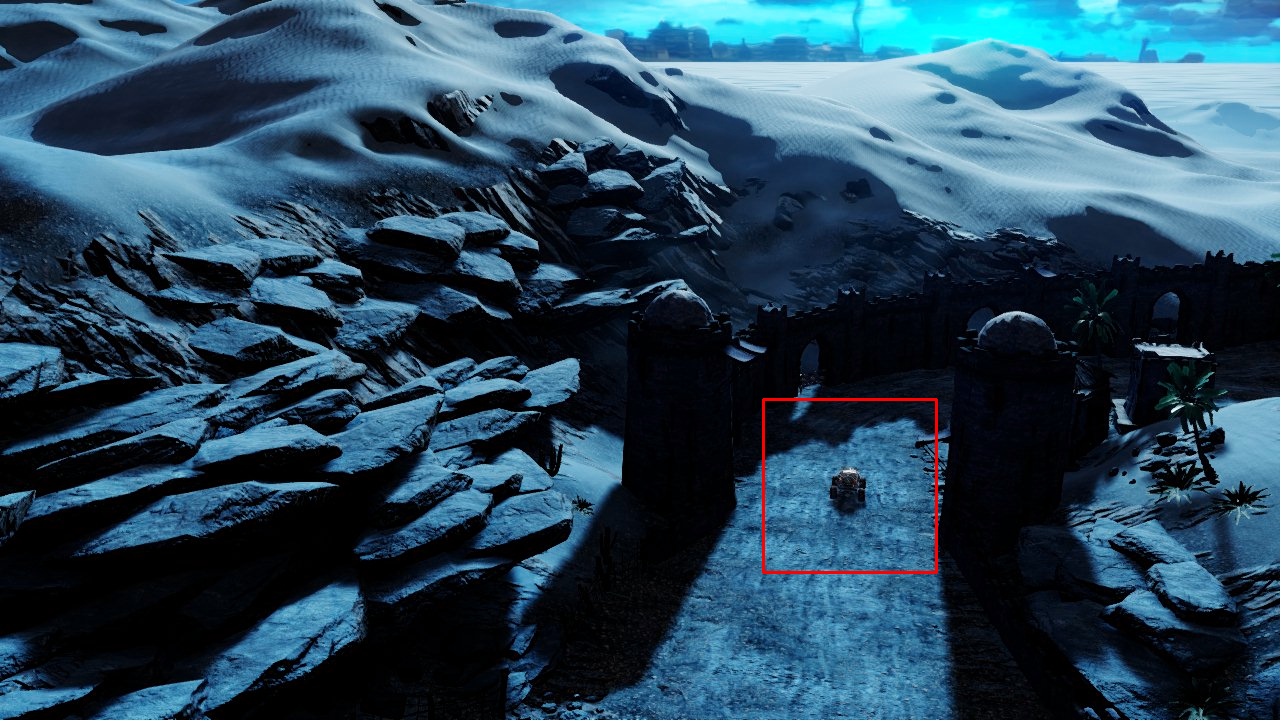

In [161]:
Image.fromarray(frame) 


In [162]:
crop_xyxy = np.array([tl[1], tl[0], br[1], br[0]])
# warpAffine transform matrix
M_13 = crop_xyxy[0]
M_23 = crop_xyxy[1]
M_11 = (crop_xyxy[2] - M_13) / (output_sz[0] - 1)
M_22 = (crop_xyxy[3] - M_23) / (output_sz[1] - 1)
mat2x3 = np.array([
    M_11,
    0,
    M_13,
    0,
    M_22,
    M_23,
]).reshape(2, 3)

In [163]:
im_patch = cv2.warpAffine(im2, mat2x3, 
                          (output_sz[0], output_sz[1]),
                          flags=(cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP),
                          borderMode=cv2.BORDER_CONSTANT,
                          borderValue=(0,0,0))

In [164]:
im2.shape

(720, 1280, 3)

In [165]:
mat2x3

array([[  0.86934673,   0.        , 763.        ],
       [  0.        ,   0.86934673, 399.        ]])

In [166]:
im2.shape

(720, 1280, 3)

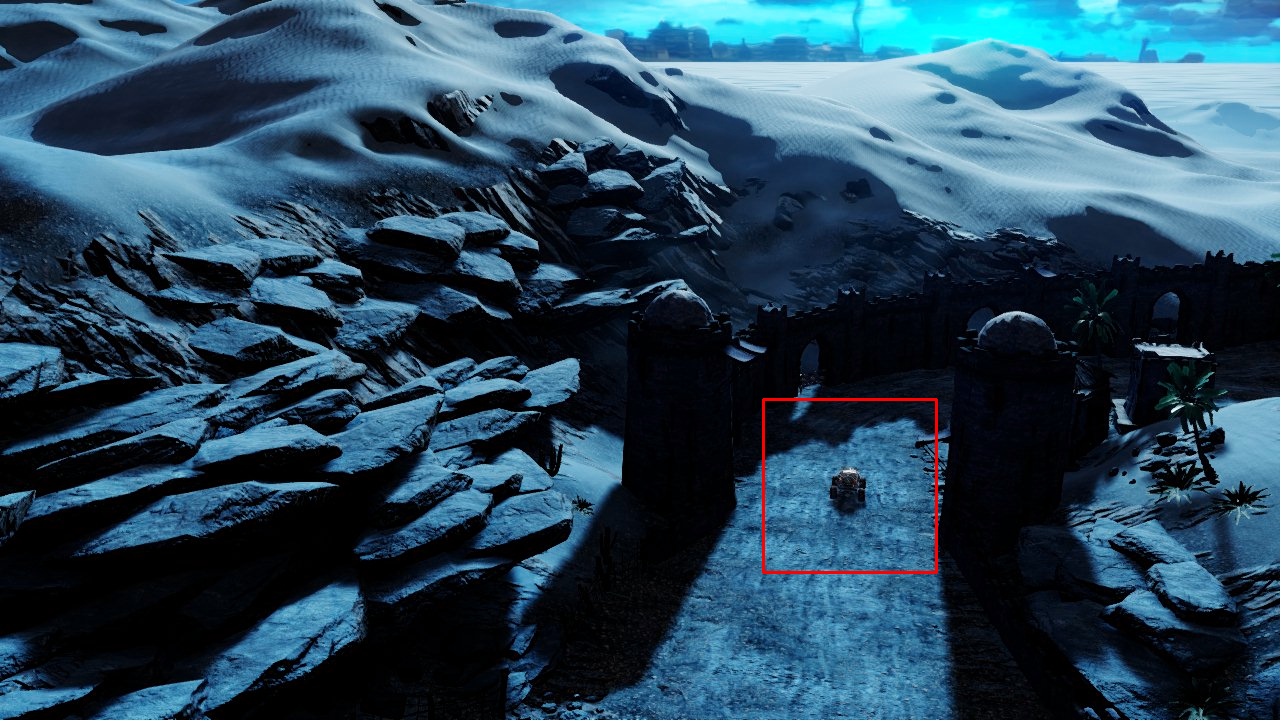

In [167]:
Image.fromarray(im2) 

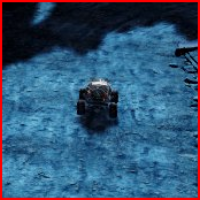

In [168]:
Image.fromarray(im_patch) 

In [ ]:

def get_crop_numpy(im: np.ndarray, pos: np.ndarray, sample_sz: np.ndarray, output_sz: np.ndarray = None,
                   mode: str = 'constant', avg_chans=(0, 0, 0), max_scale_change=None):
    """Sample an image patch.

    args:
        im: Image
        pos: center position of crop
        sample_sz: size to crop
        output_sz: size to resize to
        mode: how to treat image borders: 'replicate' (default), 'inside' or 'inside_major'
        max_scale_change: maximum allowed scale change when using 'inside' and 'inside_major' mode
    """

    # if mode not in ['replicate', 'inside']:
    #     raise ValueError('Unknown border mode \'{}\'.'.format(mode))

    # copy and convert
    posl = pos.astype(np.int).copy()

    # Get new sample size if forced inside the image
    
    if mode == 'inside' or mode == 'inside_major':
        pad_mode = 'replicate'
        # im_sz = torch.tensor([im.shape[2], im.shape[3]], device=im.device)
        # shrink_factor = (sample_sz.float() / im_sz)
        im_sz = np.array([im.shape[0], im.shape[1]])
        shrink_factor = (sample_sz.astype(np.float) / im_sz)
        if mode == 'inside':
            shrink_factor = shrink_factor.max()
        elif mode == 'inside_major':
            shrink_factor = shrink_factor.min()
        shrink_factor.clamp_(min=1, max=max_scale_change)
        # sample_sz = (sample_sz.float() / shrink_factor).long()
        sample_sz = (sample_sz.astype(np.float) / shrink_factor).astype(np.int)

    # Compute pre-downsampling factor
    if output_sz is not None:
        # resize_factor = torch.min(sample_sz.float() / output_sz.float()).item()
        resize_factor = np.min(sample_sz.astype(np.float) / output_sz.astype(np.float)).item()
        df = int(max(int(resize_factor - 0.1), 1))
    else:
        df = int(1)

    # sz = sample_sz.float() / df  # new size
    sz = sample_sz.astype(np.float) / df

    # Do downsampling
    if df > 1:
        os = posl % df  # offset
        posl = (posl - os) // df  # new position
        im2 = im[os[0].item()::df, os[1].item()::df, :]  # downsample
        # print(im2.shape)
        # print(os)
        # print(df)
    else:
        im2 = im

    # compute size to crop
    # szl = torch.max(sz.round(), torch.tensor([2.0], dtype=sz.dtype, device=sz.device)).long()
    szl = np.maximum(np.round(sz), 2.0).astype(np.int)

    # Extract top and bottom coordinates
    tl = posl - (szl - 1) // 2
    br = posl + szl // 2 + 1

    # Shift the crop to inside
    if mode == 'inside' or mode == 'inside_major':
        # im2_sz = torch.LongTensor([im2.shape[2], im2.shape[3]])
        # shift = (-tl).clamp(0) - (br - im2_sz).clamp(0)
        im2_sz = np.array([im2.shape[0], im2.shape[1]], dtype=np.int)
        shift = np.clip(-tl, 0) - np.clip(br - im2_sz, 0)
        tl += shift
        br += shift

        # outside = ((-tl).clamp(0) + (br - im2_sz).clamp(0)) // 2
        # shift = (-tl - outside) * (outside > 0).long()
        outside = (np.clip(-tl, 0) - np.clip(br - im2_sz, 0)) // 2
        shift = (-tl - outside) * (outside > 0).astype(np.int)
        tl += shift
        br += shift

        # Get image patch
        # im_patch = im2[...,tl[0].item():br[0].item(),tl[1].item():br[1].item()]

    crop_xyxy = np.array([tl[1], tl[0], br[1], br[0]])
    # warpAffine transform matrix
    M_13 = crop_xyxy[0]
    M_23 = crop_xyxy[1]
    M_11 = (crop_xyxy[2] - M_13) / (output_sz[0] - 1)
    M_22 = (crop_xyxy[3] - M_23) / (output_sz[1] - 1)
    mat2x3 = np.array([
        M_11,
        0,
        M_13,
        0,
        M_22,
        M_23,
    ]).reshape(2, 3)

    # cv2.imshow("im2", im2)
    # print("im2 shape ", im2.shape)
    # print(os)

    im_patch = cv2.warpAffine(im2, mat2x3, 
                              (output_sz[0], output_sz[1]),
                              flags=(cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP),
                              borderMode=cv2.BORDER_CONSTANT,
                              borderValue=tuple(map(int, avg_chans)))
    

    # cv2.imshow("im_patch", im_patch)
    # cv2.waitKey(0)
    # Get image coordinates
    patch_coord = df * np.concatenate([tl, br]).reshape(1, 4)
    scale = output_sz / (np.array([br[1] - tl[1] + 1, br[0] - tl[0] + 1]) * df)
    return im_patch, patch_coord, scale
